# Diagnóstico de cáncer de mama

El objetivo es clasificar un tumor en Maligno (M) o Benigno (B) a partir de un conjunto de datos que contiene características extraídas de la imagen digitalizada de una biopsia de bulto en mama. Se dispone de 569 muestras, 357 de ellas benignas y 212 malignas. Cada
muestra posee una identificación (ID number), el diagnóstico (diagnosis) y 30 atributos relacionados a 10 características:

1. radius: media de las distancias desde el centro hacia puntos del perímetro.
2. texture: desviación estándar de las intensidades en escala de grises.
3. perimeter.
4. area.
5. smoothness: variación local de largo de los radios.
6. compactness: perimeter2 / area - 1.0
7. concavity: severidad de secciones cóncavas en la delineación.
8. concave points: número de secciones cóncavas en la delineación.
9. symmetry.
10. fractal dimension: "coastline approximation" - 1




# Hito N° 2 

Descripción del o los modelos predictivos a utilizar, la metodología utilizada para ajustarlos, resultados y conclusión.

# Desarrollo

## 1. Preprocesamiento

Como buena práctica antes de ajustar un módelo de aprendizaje (no) supervisado se debe preprocesar los datos, para lo cual se recomienda efectuar al menos las siguientes tareas:

1. Análisis exploratorio de los datos, estadísticas básicas.
2. Verificar la cantidad de datos ausentes (missing values)
3. Imputación de datos ausentes (KNN, media, ect)
4. Tratamiento de variables categóricas (OneHotEnconding, dummies)
5. Identificación e imputación de datos atípicos.
6. Análisis de multicolinealidad de los datos (Análisis de correlación, diagramas de caja, dispersión, etc)
7. Selección de variables (características, features, campos, columnas)
8. Escalamieto de los datos
9. División de los datos en conjunto de entrenamiento, prueba/validación.



### 1.1 Importación de los datos

In [1]:
# pandas es un módulo que contiene un conjunto de clases 
# y funciones para trabajar con datos tabulares o estructurados.
import pandas as pd

# La función read_csv lee un archivo csv y lo carga en memoria como 
# una instancia del objeto dataframe en memoria ram.
dataset = pd.read_csv('data_breast_cancer.csv', sep=',')
dataset.shape

(569, 33)

In [2]:
# La función head entrega las n primeras filas del dataframe
dataset.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [3]:
# La función info entrega 3 campos, el nombre de la variable, la cantidad de valores 
# no nulos y nulos, junto con el tipo de variable, ojo que object es todo tipo de 
# datos que no es númerico, como lo son las cadenas de texto
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- Eliminaremos las columnas <code>id</code> y <code>Unnamed:32</code>

In [4]:
# Drop elimina las columnas/variables/features indicadas en la lista, el 
# axis si es 0 indica que se considera el index y 1 para las columnas
# inplace true indica que se efectue la operación y se actualice el dataframe 
dataset.drop(['id','Unnamed: 32'], axis=1, inplace=True)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### 1.2 Detección de datos ausentes

- No existen omisiones en los datos, conforme al resultado de la función <code>dataset.info()</code> de la clase <code>Dataframe</code> del módulo <code>pandas</code>

### 1.3 Modificación variable objetivo

- Cambiaremos el tipo de dato de la variable objetivo, a binaria, 1 si el diagnóstico es M y 0 en otro caso.

In [5]:
def to_binary(x):
    if x == 'M':
        return 1
    else:
        return 0

# La función apply indica que se aplique la función to_binary a todos los valores de la columna
# diagnosis
dataset.diagnosis = dataset.diagnosis.apply(to_binary)


In [6]:
# values_counts cuenta la frecuencia por cada valor único en la columna
dataset.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

- La clase 0 indica que la persona presenta un diagnostico benigno.
- La clase 1 indica que la persona presenta un diagnostico maligno. 

**NOTA:** Siempre verificar el balanceo de la variable objetivo, en este caso los valores son cercanos por lo que no tendremos inconvenientes. En cambio, por ejemplo si tengo que de 10 personas solo una sobrevive, existe un problema de desbalanceo de clases y se debe aplicar técnicas que permitan eliminar ese sesgo, buscar en google oversampling.

### 1.4 Datos atípicos

Se buscarán los puntos atípicos en el set de datos y se imputarán mediante la técnica de distribución de cuartiles.

In [7]:
# Plotly es el módulo de gráfico más versátil de python, ya que se puede integrar 
# con aplicaciones web, por ejemplo usando DASH puedo gráficar los predictores 
# de un módelo y visualizar como este cambia al modificar los parámetros. 

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Se crea el marco de dos filas por 5 columnas para colocar gráficos de caja
fig = make_subplots(rows=2,cols=5)

# Se agregan los gráficos de caja al marco anterior, donde row y col indican cual es la posición.
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.radius_mean, name='radius_mean'), row=1, col=1)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.texture_mean, name='texture_mean'), row=1, col=2)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.perimeter_mean, name='perimeter_mean'), row=1, col=3)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.area_mean, name='area_mean'), row=1, col=4)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.smoothness_mean, name='smoothness_mean'), row=1, col=5)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.compactness_mean, name='compactness_mean'), row=2, col=1)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset['concave points_mean'], name='concave points_mean'), row=2, col=2)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.symmetry_mean, name='symmetry_mean'), row=2, col=3)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.fractal_dimension_mean, name='fractal_dimension_mean'), row=2, col=4)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.concavity_mean, name='concavity_mean'), row=2, col=5)

# Con esto se setea el título del gráfico y 
# Se definen los márgenes
fig.update_layout(
    title = go.layout.Title(text='Boxplot Grupo Medias'),
    margin=dict(l=20, r=20, t=50, b=20)
)

# Estando listo las configuraciones, se despliega el gráfico.
fig.show()

In [8]:
fig2 = make_subplots(rows=2,cols=5)

fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.radius_se, name='radius_se'), row=1, col=1)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.texture_se, name='texture_se'), row=1, col=2)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.perimeter_se, name='perimeter_se'), row=1, col=3)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.area_se, name='area_se'), row=1, col=4)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.smoothness_se, name='smoothness_se'), row=1, col=5)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.compactness_se, name='compactness_se'), row=2, col=1)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset['concave points_se'], name='concave points_se'), row=2, col=2)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.symmetry_se, name='symmetry_se'), row=2, col=3)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.fractal_dimension_se, name='fractal_dimension_se'), row=2, col=4)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.concavity_se, name='concavity_se'), row=2, col=5)

fig2.update_layout(
    title = go.layout.Title(text='Boxplot Grupo SE'),
    margin=dict(l=20, r=20, t=50, b=20)
)

fig2.show()

In [9]:
fig3 = make_subplots(rows=2,cols=5)

fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.radius_worst, name='radius_worst'), row=1, col=1)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.texture_worst, name='texture_worst'), row=1, col=2)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.perimeter_worst, name='perimeter_worst'), row=1, col=3)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.area_worst, name='area_worst'), row=1, col=4)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.smoothness_worst, name='smoothness_worst'), row=1, col=5)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.compactness_worst, name='compactness_worst'), row=2, col=1)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset['concave points_worst'], name='concave points_worst'), row=2, col=2)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.symmetry_worst, name='symmetry_worst'), row=2, col=3)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.fractal_dimension_worst, name='fractal_dimension_worst'), row=2, col=4)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.concavity_worst, name='concavity_worst'), row=2, col=5)

fig3.update_layout(
    title = go.layout.Title(text='Boxplot Grupo Worst'),
    margin=dict(l=20, r=20, t=50, b=20)
)

fig3.show()

In [10]:
# iloc permite filtrar filas y columnas mediante el índice [f0:fn,c0:cn], luego se aplica
# la función describe que entrega solo para datos númericos sus estadísticas 
# básicas
dataset.iloc[:,1:32].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


- Podemos observar que existen datos atipicos, que pueden influir negativamente en los resultados de nuestro modelo, por lo que seran imputados.
- Se imputaran utilizando el método del rango intercuartil, que es la diferencia entre el tercer y primer cuartil de los datos.

In [11]:
columns = dataset.iloc[:,1:32].columns
columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
# Función de imputación de datos atípicos
# Por cada columna del dataframe, efectúa los cálculos y reemplaza los valores atípicos
# por la media del conjunto completo, también, podría considerarse
# reemplazar por la media de los k vecinos más cercanos 
import numpy as np
for column in columns:
    q25, q75 = np.percentile(dataset[column], 25), np.percentile(dataset[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    dataset[column].replace(
        to_replace = [x for x in dataset[column] if x < lower or x > upper], 
        value = dataset[column].median(),inplace=True #Aquí se podría aplicar KNN means replace
    )


In [13]:
fig = make_subplots(rows=2,cols=5)

fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.radius_mean, name='radius_mean'), row=1, col=1)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.texture_mean, name='texture_mean'), row=1, col=2)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.perimeter_mean, name='perimeter_mean'), row=1, col=3)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.area_mean, name='area_mean'), row=1, col=4)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.smoothness_mean, name='smoothness_mean'), row=1, col=5)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.compactness_mean, name='compactness_mean'), row=2, col=1)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset['concave points_mean'], name='concave points_mean'), row=2, col=2)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.symmetry_mean, name='symmetry_mean'), row=2, col=3)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.fractal_dimension_mean, name='fractal_dimension_mean'), row=2, col=4)
fig.add_trace(go.Box(x=dataset.diagnosis, y=dataset.concavity_mean, name='concavity_mean'), row=2, col=5)

fig.update_layout(
    title = go.layout.Title(text='Boxplot Grupo Medias'),
    margin=dict(l=20, r=20, t=50, b=20)
)

fig.show()

In [14]:
fig2 = make_subplots(rows=2,cols=5)

fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.radius_se, name='radius_se'), row=1, col=1)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.texture_se, name='texture_se'), row=1, col=2)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.perimeter_se, name='perimeter_se'), row=1, col=3)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.area_se, name='area_se'), row=1, col=4)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.smoothness_se, name='smoothness_se'), row=1, col=5)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.compactness_se, name='compactness_se'), row=2, col=1)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset['concave points_se'], name='concave points_se'), row=2, col=2)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.symmetry_se, name='symmetry_se'), row=2, col=3)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.fractal_dimension_se, name='fractal_dimension_se'), row=2, col=4)
fig2.add_trace(go.Box(x=dataset.diagnosis, y=dataset.concavity_se, name='concavity_se'), row=2, col=5)

fig2.update_layout(
    title = go.layout.Title(text='Boxplot Grupo SE'),
    margin=dict(l=20, r=20, t=50, b=20)
)

fig2.show()

In [143]:
fig3 = make_subplots(rows=2,cols=5)

fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.radius_worst, name='radius_worst'), row=1, col=1)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.texture_worst, name='texture_worst'), row=1, col=2)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.perimeter_worst, name='perimeter_worst'), row=1, col=3)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.area_worst, name='area_worst'), row=1, col=4)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.smoothness_worst, name='smoothness_worst'), row=1, col=5)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.compactness_worst, name='compactness_worst'), row=2, col=1)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset['concave points_worst'], name='concave points_worst'), row=2, col=2)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.symmetry_worst, name='symmetry_worst'), row=2, col=3)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.fractal_dimension_worst, name='fractal_dimension_worst'), row=2, col=4)
fig3.add_trace(go.Box(x=dataset.diagnosis, y=dataset.concavity_worst, name='concavity_worst'), row=2, col=5)

fig3.update_layout(
    title = go.layout.Title(text='Boxplot Grupo Worst'),
    margin=dict(l=20, r=20, t=50, b=20)
)

fig3.show()

### 1.5 Multicolinealidad

Análisis de correlatividad con el ojetivo de eliminar variables altamente correlacionadas. Como criterio se eliminaron aquellas variables sobre 0.9, dependiendo del criterio experto se pueden adoptar otras estrategías, como por ejemplo aplicar aleatoriamente varios algoritmos de árbol de decisión y calcular la importancia de los predictores para crear un ranking.

<AxesSubplot:>

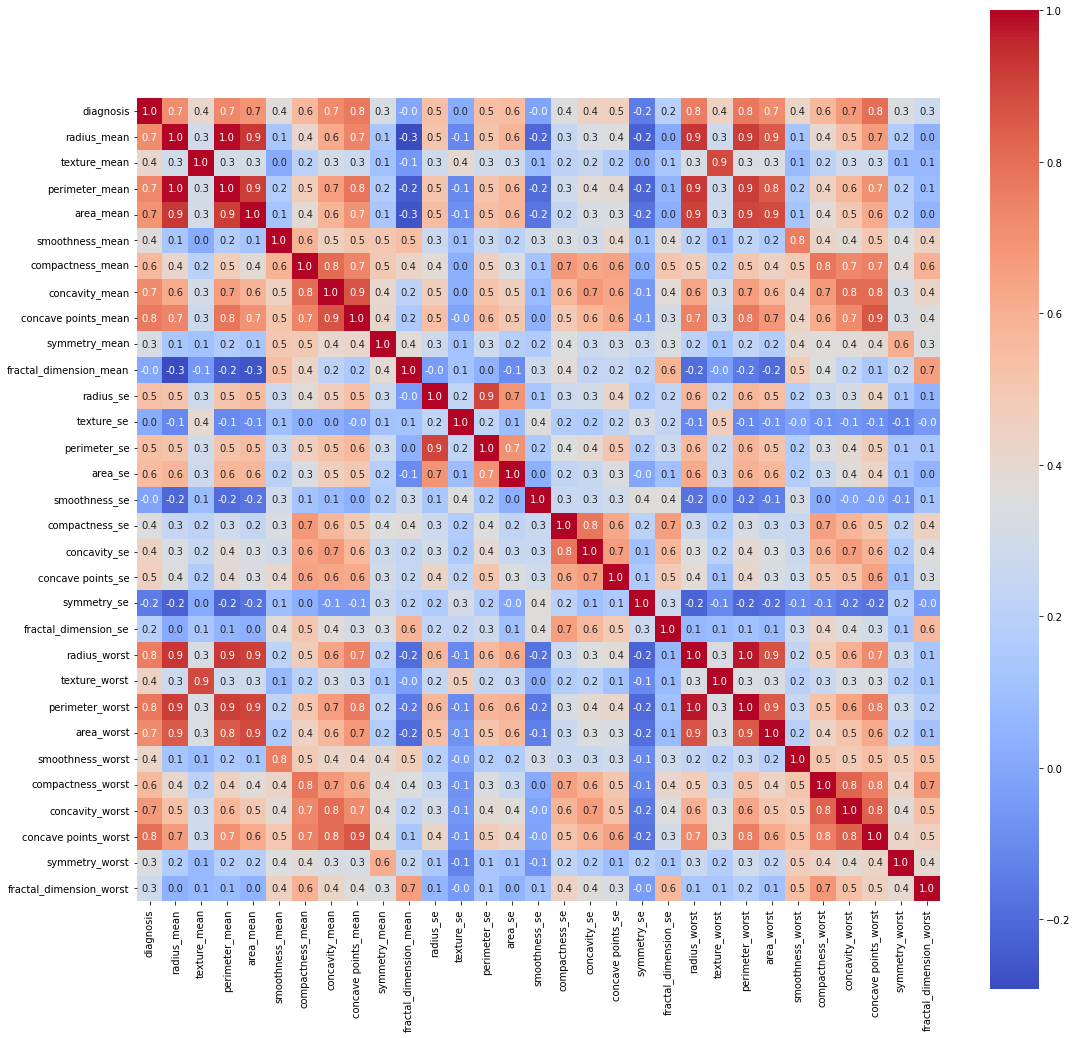

In [15]:
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

corr = dataset.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 10},
           cmap= 'coolwarm')

- Se excluiran aquellas variables que contengan una alta correlación, solo manteniendo una de ellas. 
 A eliminar 


In [16]:
# Creamos una copia del conjunto de datos
dataset_backup = dataset

In [17]:
dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
variables_eliminar = [
    'perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se',
    'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
    'area_worst', 'concave points_worst'
    ]

In [19]:
# Eliminamos las variables altamente correlacionadas
dataset.drop(variables_eliminar,axis=1, inplace=True)


<AxesSubplot:>

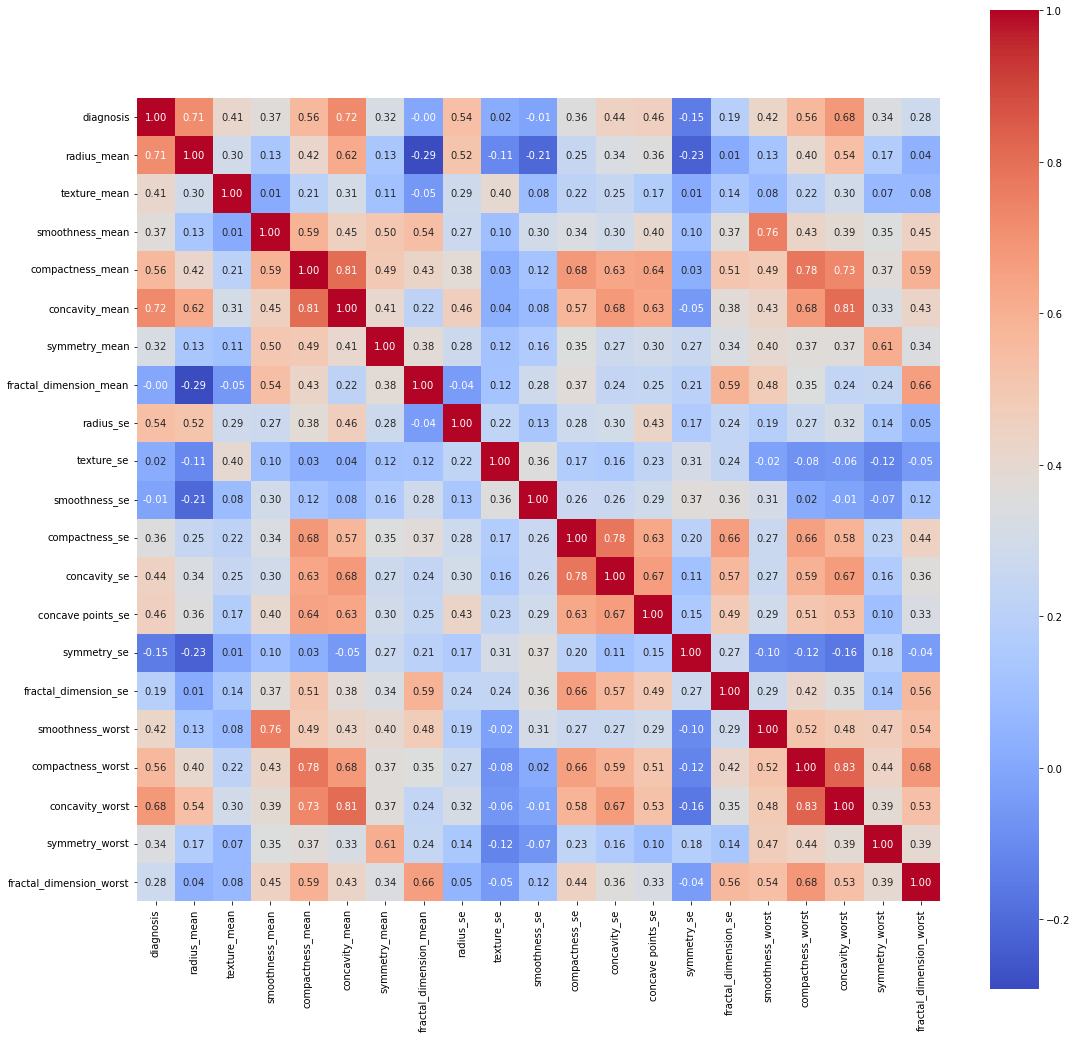

In [20]:
# Volvemos a gráficar
corr = dataset.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           cmap= 'coolwarm')

### 1.6 Escalamiento de los datos

Se utilizará la clase StandardScaler del módulo sklearn, su documentación indica que:

Standardize features by removing the mean and scaling to unit variance.
The standard score of a sample x is calculated as:
$$z = (x - u) / s$$

**NOTA:** Se aconseja trabajar con VSCode y Anaconda, ya que en VSCode tienen autocomplete y 
pueden ver la documentación de clases y funciones en el mismo editor. Además pueden instalar GIT para el control de versiones de su código, junto con crearse un repositorio en GitHub.

>https://opensourceoptions.com/blog/setup-anaconda-python-to-work-with-visual-studio-code-on-windows/

In [21]:
from sklearn.preprocessing import StandardScaler


col_names = dataset.iloc[:,1:32].columns
scaler = StandardScaler().fit(dataset.iloc[:,1:32].values)
features = scaler.transform(dataset.iloc[:,1:32].values)
dataset[col_names] = features

dataset.describe()


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,0.372583,-1.198026e-16,-4.042851e-16,-6.374209e-16,-1.599970e-17,-4.643815e-17,-5.073075e-18,-3.742369e-16,-1.458021e-16,1.974597e-16,...,-2.185325e-17,1.272171e-16,-1.802893e-16,-4.046753e-16,2.175569e-17,-4.316016e-16,1.002908e-16,9.443725e-17,-7.788878e-16,2.321908e-17
std,0.483918,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,0.000000,-2.218783e+00,-2.351040e+00,-2.553720e+00,-1.797808e+00,-1.231526e+00,-2.637785e+00,-2.088541e+00,-1.476314e+00,-1.866523e+00,...,-1.642362e+00,-1.576199e+00,-2.291625e+00,-2.054122e+00,-1.677174e+00,-2.363638e+00,-1.653239e+00,-1.410523e+00,-2.697138e+00,-1.941608e+00
25%,0.000000,-6.951541e-01,-7.360862e-01,-7.312768e-01,-7.746323e-01,-7.761902e-01,-7.259291e-01,-7.624879e-01,-7.269182e-01,-7.490776e-01,...,-7.658322e-01,-7.221581e-01,-7.177150e-01,-7.366422e-01,-7.540220e-01,-7.072126e-01,-7.133651e-01,-7.820227e-01,-6.804106e-01,-7.380864e-01
50%,0.000000,-1.559593e-01,-6.860525e-02,-9.924930e-03,-1.520545e-01,-2.835775e-01,-1.483456e-05,-1.046014e-01,-1.578978e-01,-1.024831e-01,...,-1.692289e-01,-1.109157e-01,-3.935551e-02,-9.039277e-02,-1.134372e-01,-1.840221e-02,-2.062361e-01,-1.661471e-01,2.570493e-03,-1.092060e-01
75%,1.000000,5.188415e-01,6.213751e-01,6.786382e-01,6.313915e-01,5.676350e-01,6.372703e-01,6.063958e-01,4.433547e-01,6.099268e-01,...,6.248931e-01,6.101239e-01,5.994399e-01,5.069806e-01,5.598932e-01,6.282361e-01,6.018783e-01,6.358086e-01,6.189717e-01,5.915045e-01
max,1.000000,2.549701e+00,2.713815e+00,2.859469e+00,2.898375e+00,3.096935e+00,2.815013e+00,2.837042e+00,3.055394e+00,3.006644e+00,...,3.083352e+00,3.082826e+00,2.915589e+00,2.938109e+00,3.180219e+00,2.652495e+00,3.029357e+00,2.830895e+00,2.863359e+00,2.995616e+00


## 2. División de los datos

Mediante la función train_test_split se dividen los datos para entrenar y validar los modelos.

In [22]:
from sklearn.model_selection import train_test_split

# Mis Xs son mis variables predictoras (features), de las cuales los algoritmos de predicción 
# aprenden.
X = dataset.iloc[:,1:32]

# nuestra y es la variable objetivo
y = dataset['diagnosis']

# Se considera un 70% para entrenamiento y un 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## 3. Modelo de clasificación mediante Regresión Logística

La regresión logística es un método estadístico supervisado para predecir clases binarias, en este caso, tiene o no cáncer, cuyo resultado es de naturaleza dicotómica. Si se cumple los supuestos y se logra convergencia, el método de predicción mediante regresión logística resulta ser el más robusto.  

**Consideraciones para construir un modelo de regresión logística**
1. Variable objetivo debe ser dicotómica.
2. Los predictores son variables independientes.
3. Para tener un modelo más estable los predictores deben tener una distribución normal.
4. No debe existir multicolinealidad, ya que puede llevar a predicciones sesgadas. Se recomienda utilizar un diagrama de dispersión. 
5. Verificar la normalidad multivariante. 

**NOTA:** La desventaja de este modelo en la vida real es su costo de procesamiento y tiempo de ejecución, además la validación de los supuestos no siempre se cumple.

### 3.1 Ajuste de hiperparámetros

Generalmente, para entrenar un modelo, se deben definir parámetros, estos parámetros obedecen a 
supuestos estadísticos, funciones de optimización, umbrales, márgenes de error, entre otros.


Mediante una búsquedad exhaustiva, se itera n veces en k validaciones cruzadas, para estimar cuales son los mejores parámetros y el mejor modelo de clasificación para nuestro conjunto de datos. 

> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# Se crea un instancia de la clase LogisticRegression que implementa el algoritmo de clasificación
# si observan no tiene parámetros
logModel = LogisticRegression()

# Mediante gridsearch se buscara la mejor combinación de estos parámetros
# se aconseja leer link de arriba sobre LogisticRegression
# para enteder que parámetros de deben definir
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [1000, 2500, 5000]
    }
]

> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
GridSearchCV: Exhaustive search over specified parameter values for an estimator.

In [24]:
# Se crea la instancia de la clase GridSearchCV que implementa lo que venimos hablando
# Se indica el modelo de clasificación, el diccionario de parámetros, cantidad de validaciones
# verbose para que muestre o no la info en consola del proceso
# y n_jobs -1 para que utilice todas las cpu
clf = GridSearchCV(
    logModel, 
    param_grid = param_grid, 
    cv = 10, 
    verbose=False, 
    n_jobs=-1
    )

In [25]:
# Una ves configurado todo, se ejecuta la busquedad exhaustiva. 
# Dependendieno de la máquina, tomara su n tiempo.
best_clf = clf.fit(X,y)

c:\Users\sebas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


5400 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sebas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sebas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\sebas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError

Los warnings anterior se debe a que ciertas combinaciones de parámetros son inválidos, por ejemplo:
 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


A continución se obtiene el mejor modelo estimado por la búsqueda, el cual contiene la mejor evaluación obtenida, por ejemplo, analicemos su output:

One or more of the test scores are non-finite: [       nan        nan 0.62741228 ...        nan 0.94906015 0.94906015]

eso quiere decir que existieron combinaciones de parametros que obtuvieron un accuracy solo del 62%.

In [26]:
# Propiedad de la clase GridSearchCV, el cual entrega el modelo mejor estimado.
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, max_iter=1000)

Se econtró que el mejor modelo es LogisticRegression(C=0.23357214690901212, max_iter=1000)

In [27]:
# Guardamos nuestro modelo a otra variables
lr_model_clf = best_clf.best_estimator_

In [28]:
# Imprimimos el accuracy del modelo utilizando los datos de entrenamiento
print (f'Accuracy - : {lr_model_clf.score(X,y):.3f}')

Accuracy - : 0.970


In [29]:
# Imprimimos el accuracy del modelo utilizando los datos de prueba
print (f'Accuracy - : {lr_model_clf.score(X_test,y_test):.3f}')

Accuracy - : 0.977


### 3.2 Modelo Regresión Logística

Tomamos la mejor combinación de hiperparametros y ajustamos un nuevo modelo de clasificación mediante regresión logística.

In [30]:
# Se crea una instancia del modelo con los siguientes parámetros
lr_model = LogisticRegression(C=0.23357214690901212, max_iter=1000)

In [31]:
# Ajustamos el modelo a nuestro datos, esta es la parte supervisada, a partir de nuestros datos
# el algoritmo aprende a como clasificar
lr_model_fit = lr_model.fit(X_train,y_train)

In [32]:
#Evaluamos el modelo entrenado sobre los datos de prueba
print(lr_model_fit.score(X_test,y_test))

0.9766081871345029


## 4. Evaluación de un modelo de clasificación

Se define una función que a partir de una matriz de confusión calcula todas las métricas
que indican que tan bien se ajusta nuestro modelo al problema, tambien, sirve para compararlos con otros algoritmos.

In [33]:
from numpy import sqrt

def model_diagnostic_stats(confusion_matrix):

    tp = confusion_matrix[1,1] # Número de resultados donde ambas pruebas son positivas; verdadero positivo
    tn = confusion_matrix[0,0] # Número de resultados donde el método candidato es positivo, pero el comparativo es negativo; verdadero negativo
    fp = confusion_matrix[0,1] # Número de resultados donde el método candidato es negativo, pero el comparativo es positivo; falso positivo
    fn = confusion_matrix[1,0] # Número de resultados donde ambos métodos son negativos. falso negativo
    
    p = tp + fn
    n = fp + tn
    pp = tp + fp
    pn = fn + tn
    
    #Diccionario de datos que contiene las métricas
    diagnostic_dict = {   
        'recall' : tp/p,
        'false_neg_rate' : fn/p,
        'false_pos_rate' : fp/n,
        'true_neg_rate' : tn/n,
        'positive_liklihood_ratio' : (tp/p)/(fp/n),
        'neg_liklihood_rate' : (fn/p)/(tn/n),
        'precision' : tp/pp,
        'false_omission_rate' : fn/pn,
        'false_discovery_rate' : fp/pp,
        'neg_pred_value' : tn/pn,
        'markedness' : (tp/pp)+(tn/pn)-1,
        'diagnostic_odds_ration' : ((tp/p)/(fp/n))/( (fn/p)/(tn/n)),
        'informedness' : (tp/p)+(tn/n)-1,
        'prevalence_threshold' : (sqrt((tp/p)*(fp/n))-(fp/n))/((tp/p)-(fp/n)),
        'prevalence' : p/(p+n),
        'accuracy' : (tp+tn)/(p+n),
        'balanced_accuracy' : ((tp/p)+(tn/n))/2,
        'F1_score' : 2*tp/(2*tp+fp+fn),
        'fowlkes_mallows_index' : sqrt((tp/pp)*(tp/p)),
        'jaccard_index' : tp/(tp+fn+fp),
    }
    
    return diagnostic_dict

construcción de una matriz de confusión, donde se pasa las etiquetas originales de los datos <code>y_test</code> junto con los valores predecidos por el modelo <code>pred</code>

In [34]:
from sklearn.metrics import confusion_matrix

# X_test tiene el mismo formato de los datos de entrenamiento 
# IMPORTANTE: Para utilizar el módelo para predecir, los datos deben contener la aplicación 
# de todo el preprocesamiento efectuado a los datos utilizados para entrenar el modelo
pred = lr_model_fit.predict(X_test)

# se crea una matriz de confusión
cm = confusion_matrix(y_test,pred)


In [35]:
# El modelo entrega las etiquetas predecidas 
# para el conjunto de predictores entregados
pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [36]:
# estas son las etiquetas originales
y_test.to_numpy()

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [37]:
# Esta es la matriz de confusión
# x  0  1
# 0  ?  ?
# 1  ?  ?
cm

array([[102,   1],
       [  3,  65]], dtype=int64)

¿Cual es la clase que mas le cuesta predecir al modelo?

In [38]:
# Se aplica la función para obtener las métricas a partir de la matriz de confusión
stats = model_diagnostic_stats(cm)
stats

{'recall': 0.9558823529411765,
 'false_neg_rate': 0.04411764705882353,
 'false_pos_rate': 0.009708737864077669,
 'true_neg_rate': 0.9902912621359223,
 'positive_liklihood_ratio': 98.45588235294119,
 'neg_liklihood_rate': 0.044550173010380625,
 'precision': 0.9848484848484849,
 'false_omission_rate': 0.02857142857142857,
 'false_discovery_rate': 0.015151515151515152,
 'neg_pred_value': 0.9714285714285714,
 'markedness': 0.9562770562770564,
 'diagnostic_odds_ration': 2210.0,
 'informedness': 0.946173615077099,
 'prevalence_threshold': 0.09155418371203862,
 'prevalence': 0.39766081871345027,
 'accuracy': 0.9766081871345029,
 'balanced_accuracy': 0.9730868075385495,
 'F1_score': 0.9701492537313433,
 'fowlkes_mallows_index': 0.9702573302931147,
 'jaccard_index': 0.9420289855072463}

In [39]:
#De esta forma obtengo solo el accuracy
stats['accuracy']

0.9766081871345029

In [40]:
# Efectuamos una comparación con el modelo obtenido mediante búsquedad exhaustiva
# y el creado posteriormente ingresando los parametros obtenidos
pred2 = lr_model_clf.predict(X_test)
cm2 = confusion_matrix(y_test,pred2)
model_diagnostic_stats(cm2)

{'recall': 0.9558823529411765,
 'false_neg_rate': 0.04411764705882353,
 'false_pos_rate': 0.009708737864077669,
 'true_neg_rate': 0.9902912621359223,
 'positive_liklihood_ratio': 98.45588235294119,
 'neg_liklihood_rate': 0.044550173010380625,
 'precision': 0.9848484848484849,
 'false_omission_rate': 0.02857142857142857,
 'false_discovery_rate': 0.015151515151515152,
 'neg_pred_value': 0.9714285714285714,
 'markedness': 0.9562770562770564,
 'diagnostic_odds_ration': 2210.0,
 'informedness': 0.946173615077099,
 'prevalence_threshold': 0.09155418371203862,
 'prevalence': 0.39766081871345027,
 'accuracy': 0.9766081871345029,
 'balanced_accuracy': 0.9730868075385495,
 'F1_score': 0.9701492537313433,
 'fowlkes_mallows_index': 0.9702573302931147,
 'jaccard_index': 0.9420289855072463}

In [41]:
lr_model_clf.score(X_test,y_test)

0.9766081871345029

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dataset)
x_pca = pca.transform(dataset)

In [44]:
dataset.shape, x_pca.shape

((569, 21), (569, 2))

In [45]:
pca_df = pd.DataFrame(data=x_pca,columns = ['componente1','componente2'])
pca_df

,componente1,componente2
0,4.757537,2.510394
1,-0.375010,-2.412499
2,4.719743,-1.802940
3,2.298944,-0.718108
4,2.783529,-1.256259
...,...,...
564,2.742726,-2.109905
565,0.977941,-3.092147
566,0.779759,-2.398302
567,4.229577,0.516776


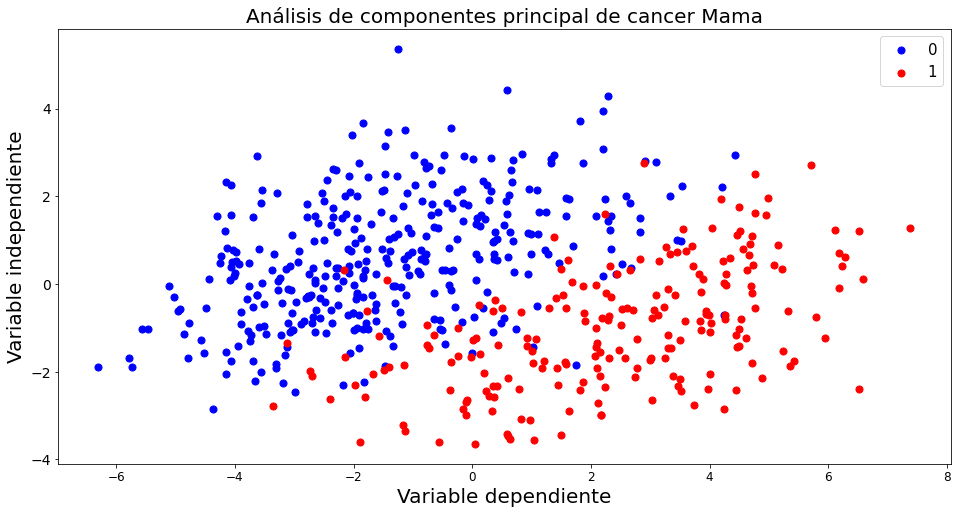

In [47]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Variable dependiente', fontsize=20)
plt.ylabel('Variable independiente',fontsize=20)
plt.title("Análisis de componentes principal de cancer Mama",fontsize = 20)
targets = [0,1]
colors = ['b','r']
for target, color in zip(targets,colors):
    indicesToKeep = dataset['diagnosis'] == target
    plt.scatter(pca_df.loc[indicesToKeep,'componente1']
               , pca_df.loc[indicesToKeep, 'componente2'],c = color,s=50)

plt.legend(targets,prop={'size':15})               
                

In [ ]:
plt.plot()

In [ ]:
# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(y_train == 1).flatten(), 1],
    y_train[(y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(y_train == 0).flatten(), 1],
    y_train[(y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística")
ax.set_ylabel("independiente")
ax.set_xlabel("Dependiente");

# Comparación con otros algoritmos de clasificación

Se evaluaran otros módelos de clasificación que se pueden aplicar a este tipo de problemas. 

## Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100, 
    min_samples_split=25, 
    max_depth=7, 
    max_features=2)


In [175]:
rf_model_fit = rf_model.fit(X_train,y_train)

In [176]:
pred_rf = rf_model_fit.predict(X_test)

In [177]:
cm_rf = confusion_matrix(y_test,pred_rf)
cm_rf

array([[100,   3],
       [  7,  61]], dtype=int64)

In [178]:
rf_stats = model_diagnostic_stats(cm_rf)
rf_stats['accuracy']

0.9415204678362573

- Importancia de predictores

In [179]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf_model_fit.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
0,texture_mean,0.164672
4,symmetry_mean,0.137223
17,symmetry_worst,0.094317
16,concavity_worst,0.076803
3,concavity_mean,0.076461
1,smoothness_mean,0.072412
7,texture_se,0.055025
15,compactness_worst,0.051573
11,concave points_se,0.043226
6,radius_se,0.042172


### Gráfico de RandomForest

Los árboles de decisión se utilizan cuando aparte de predecir, lo que se busca es, explicar la problematica mediante los atributos.

In [180]:
# Obtenemos los árboles del random forest
arboles = rf_model_fit.estimators_

In [181]:
# Cantidad de árboles
# Corresponde al hiperparametro n_estimators=100, 
len(arboles)

100

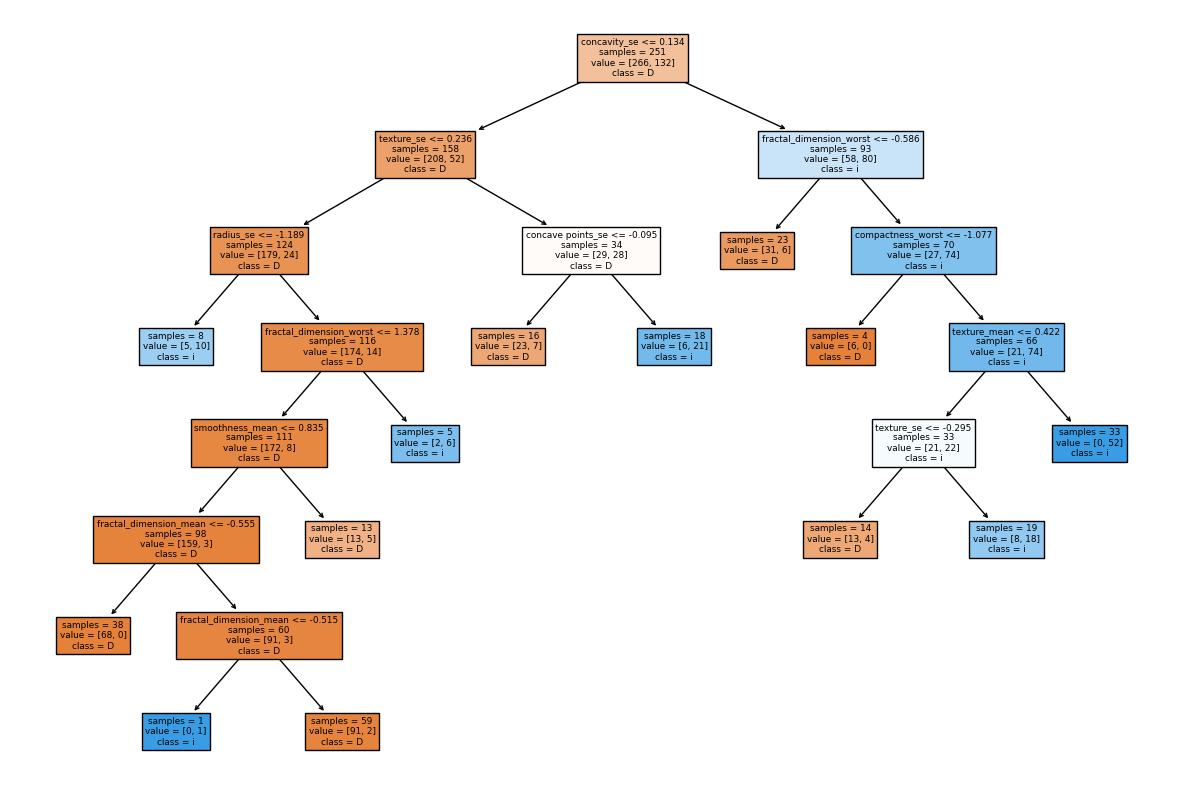

In [182]:
from sklearn.tree import plot_tree

#Gráficaremos solo 2 árbol de los 100
fig, ax = plt.subplots(figsize=(15, 10))
plot = plot_tree(
            decision_tree = arboles[0],
            feature_names = X_train.iloc[:, 1:].columns,
            class_names   = 'Diagnostico',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

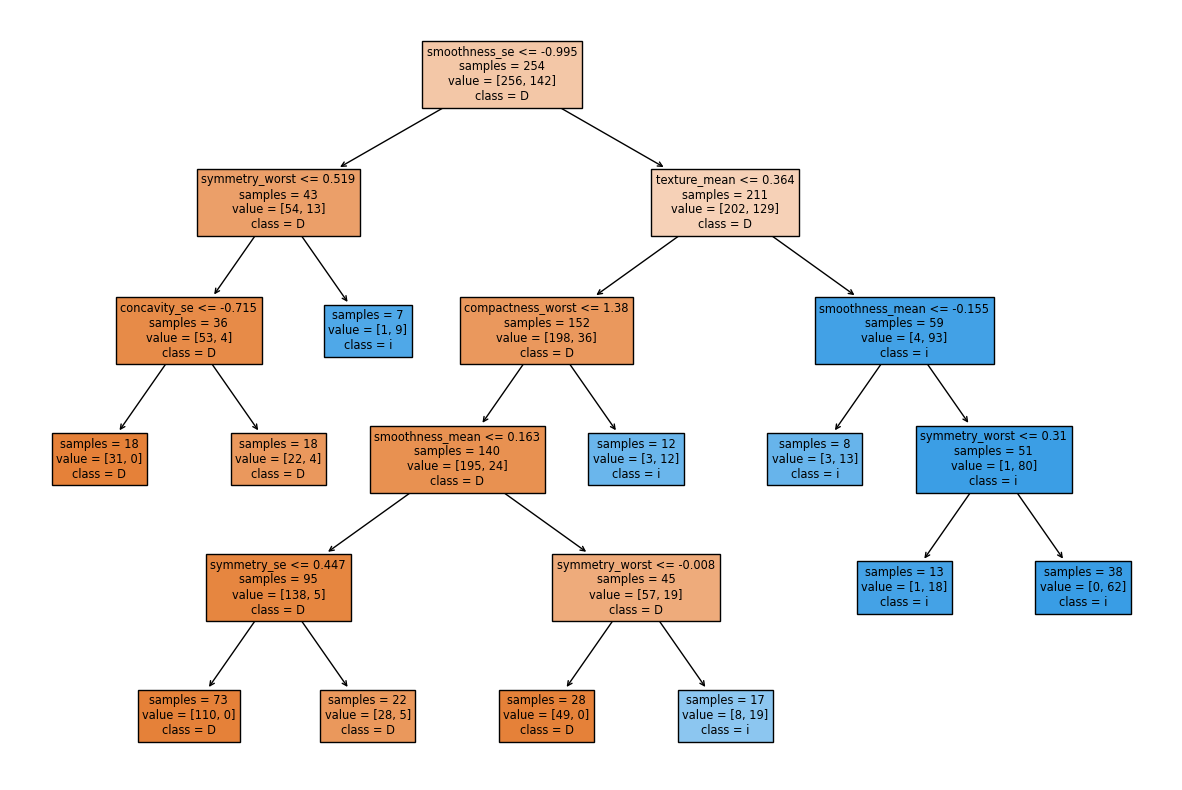

In [183]:
fig, ax = plt.subplots(figsize=(15, 10))
plot = plot_tree(
            decision_tree = arboles[26],
            feature_names = X_train.iloc[:, 1:].columns,
            class_names   = 'Diagnostico',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

## SVM



In [184]:
from sklearn.svm import SVC

svc_model = SVC(C = 100, kernel = 'linear', random_state=123)
svc_model_fit = svc_model.fit(X_train, y_train)

In [185]:
svc_pred = svc_model_fit.predict(X_test)


In [186]:
svc_cm = confusion_matrix(y_test,svc_pred)

In [187]:
svc_stats = model_diagnostic_stats(svc_cm)
svc_stats['accuracy']

0.9649122807017544

## AdaBoost




In [188]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5000, random_state=0)

ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5000,
                   random_state=0)

In [189]:
print (f'Train Accuracy - : {ada.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {ada.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.901


In [190]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(ada.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:10]

,variable,importance
0,texture_mean,0.566531
17,symmetry_worst,0.192727
1,smoothness_mean,0.071204
2,compactness_mean,0.053389
7,texture_se,0.037112
18,fractal_dimension_worst,0.020950
4,symmetry_mean,0.016927
8,smoothness_se,0.015509
11,concave points_se,0.009484
14,smoothness_worst,0.009068


## XGBoost

<code>conda install -c conda-forge py-xgboost-cpu</code>

In [191]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

model3 = XGBClassifier()
model3.fit(X_train, y_train)

[23:40:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\donfi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

c:\Users\donfi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [192]:
cross_val_score(model3, X, y, cv=10).mean()

c:\Users\donfi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

c:\Users\donfi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\donfi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_cl

[23:40:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\donfi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\donfi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

c:\Users\donfi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\donfi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a fut

[23:40:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\donfi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

c:\Users\donfi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\donfi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_cl

[23:40:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:57] WARNING:

c:\Users\donfi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

c:\Users\donfi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\donfi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_cl

0.9508458646616542

# Conclusión

- Regresión Logística: 97,66%

Los siguientes algoritmos se aplicaron con hiperparametros por defecto:
- RandomForest: 94,15%
- SVC: 96,49%
- AdaBoost: 90,1%
- XGBoost: 95,08%

Para mi este es el mejor artículo que resuelve su problema:
>https://towardsdatascience.com/logistic-regression-for-malignancy-prediction-in-cancer-27b1a1960184